# Poincaré sections

The Duffing equation is given by

$$
\ddot {x}+\delta {\dot {x}}+\alpha x+\beta x^{3}=\gamma \cos(\omega t),
$$

see [Wikipedia](https://en.wikipedia.org/wiki/Duffing_equation). To make animations you can also refer to https://scipython.com/blog/the-duffing-oscillator/

We will consider the case $\alpha = -1$, $\beta=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def duffing(t, coords, delta, gamma, omega):
    x, xdot = coords
    xdotdot = -(x**3 - x) - delta * xdot + gamma * np.cos(omega*t)
    return xdot, xdotdot

In [3]:
params = [0.1, 0.39, 1.4]   # open the page on Wikipedia and try different solutions
delta, gamma, omega = params
t_span = (0,10000)
ic = (1, 0)

sol = solve_ivp(duffing, t_span, ic, args=params)

sol_poincare = solve_ivp(duffing, t_span, ic, args=params,
                         t_eval=np.arange(0,t_span[1],2*np.pi/omega)   # Store solution at time 2 pi / omega
                         )

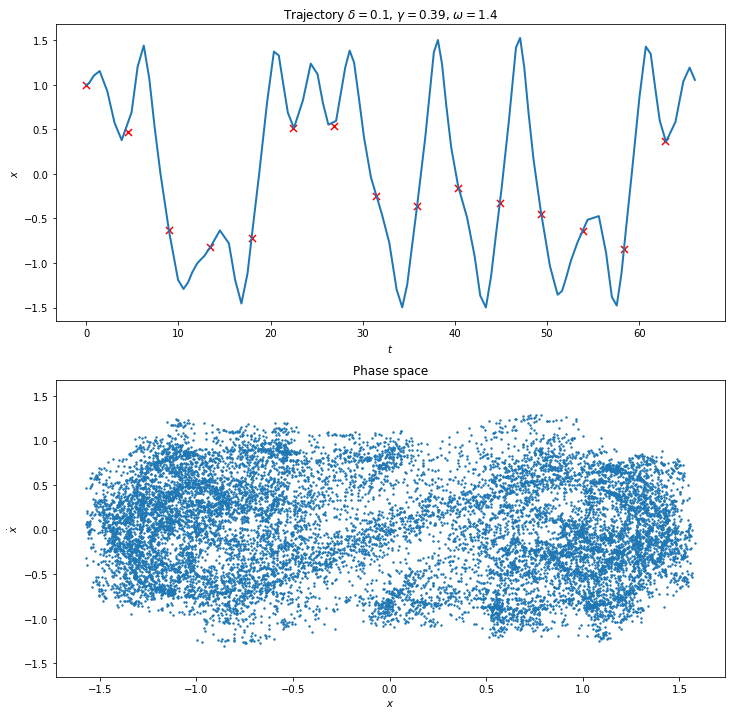

In [4]:
cut = 100
filter = sol_poincare.t < sol.t[cut]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12), sharey=True)

ax1.set_title(f"Trajectory $\delta={delta}$, $\gamma={gamma}$, $\omega={omega}$")
ax1.plot(sol.t[0:cut], sol.y[0][0:cut], linewidth=2) # truncated to show the oscillations
ax1.scatter(sol_poincare.t[filter], sol_poincare.y[0][filter], c="r", s=50, marker="x")
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")

ax2.set_title("Phase space")
ax2.scatter(sol.y[0], sol.y[1], s=2)
ax2.set_xlabel("$x$")
ax2.set_ylabel("$\dot x$")

plt.show()

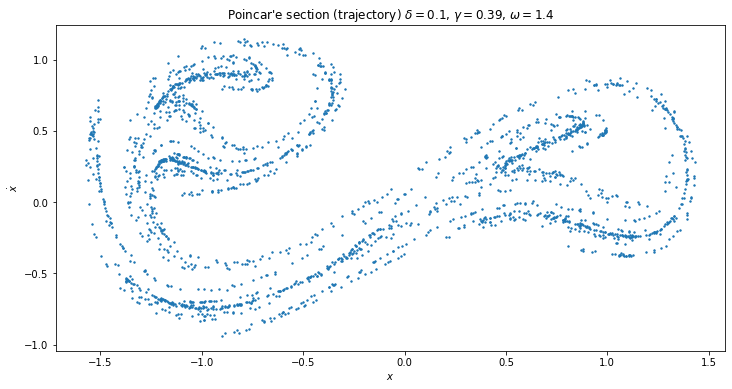

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.set_title(f"Poincar\'e section (trajectory) $\delta={delta}$, $\gamma={gamma}$, $\omega={omega}$")
ax.scatter(sol_poincare.y[0], sol_poincare.y[1], s=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot x$")

plt.show()

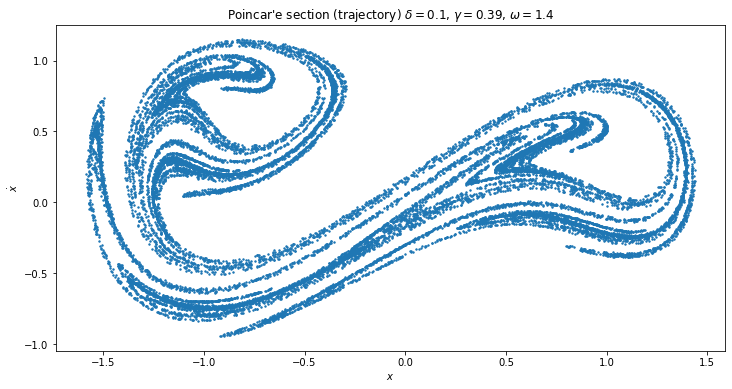

In [6]:
t_span1 = (0, t_span[1]*10)
sol_poincare1 = solve_ivp(duffing, t_span1, ic, args=params,
                         t_eval=np.arange(t_span1[0],t_span1[1],2*np.pi/omega)   # Store solution at time 2 pi / omega
                         )

fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.set_title(f"Poincar\'e section (trajectory) $\delta={delta}$, $\gamma={gamma}$, $\omega={omega}$")
ax.scatter(sol_poincare1.y[0], sol_poincare1.y[1], s=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$\dot x$")

plt.show()